# Import package

In [1]:
import numpy as np               
import pandas as pd       
import matplotlib.pyplot as plt 

# Summarize the value of C* of each classifier

In [2]:
attributes = np.array(["Arrhythmia", "Arrhythmia PCA","CTG NSP", "CTG Pattern", "Heart Disease"])
candidates = np.array(["Light GBM", "SVM", "Random Forest", "PyTorch ANN"])
raw_data = np.array([

    [0.635535, 0.034471, 0.897413,  0.492511,  0.899529],
    [0.969873, 0.972108, 0.886963,  0.966670,  0.972321],
    [0.606031, 0.938183, 1.000000,  0.887778,  0.651946],
    [0.000000, 0.595231, 0.000759,  0.011642,  0.040995],

])
TOPSIS=pd.DataFrame(data=raw_data, index=candidates, columns=attributes)

In [3]:
TOPSISS=TOPSIS.copy()

In [4]:
weights1 = np.array([0.25, 0.25, 0.25, 0.25,0.25])

# The indices of the attributes (zero-based) that are considered beneficial.
# Those indices not mentioned are assumed to be cost attributes.
benefit_attributes1 = set([0, 1, 2, 3])

In [5]:
m0 = len(raw_data)
n0 = len(attributes)
divisors = np.empty(n0)
for j in range(n0):
    column = raw_data[:,j]
    divisors[j] = np.sqrt(column @ column)

raw_data /= divisors

columns = ["$X_{%d}$" % j for j in range(n0)]
pd.DataFrame(data=raw_data, index=candidates, columns=columns)

,$X_{0}$,$X_{1}$,$X_{2}$,$X_{3}$,$X_{4}$
Light GBM,0.485746,0.023343,0.557404,0.351319,0.609060
SVM,0.741283,0.658294,0.550914,0.689546,0.658346
Random Forest,0.463195,0.635320,0.621124,0.633271,0.441425
PyTorch ANN,0.000000,0.403079,0.000471,0.008304,0.027757


In [6]:
raw_data *= weights1
pd.DataFrame(data=raw_data, index=candidates, columns=columns)

,$X_{0}$,$X_{1}$,$X_{2}$,$X_{3}$,$X_{4}$
Light GBM,0.121436,0.005836,0.139351,0.087830,0.152265
SVM,0.185321,0.164573,0.137728,0.172387,0.164587
Random Forest,0.115799,0.158830,0.155281,0.158318,0.110356
PyTorch ANN,0.000000,0.100770,0.000118,0.002076,0.006939


In [7]:
a_pos = np.zeros(n0)
a_neg = np.zeros(n0)
for j in range(n0):
    column = raw_data[:,j]
    max_val = np.max(column)
    min_val = np.min(column)
    
    # See if we want to maximize benefit or minimize cost (for PIS)
    if j in benefit_attributes1:
        a_pos[j] = max_val
        a_neg[j] = min_val
    else:
        a_pos[j] = min_val
        a_neg[j] = max_val

pd.DataFrame(data=[a_pos, a_neg], index=["$A^*$", "$A^-$"], columns=columns)

,$X_{0}$,$X_{1}$,$X_{2}$,$X_{3}$,$X_{4}$
$A^*$,0.185321,0.164573,0.155281,0.172387,0.006939
$A^-$,0.000000,0.005836,0.000118,0.002076,0.164587


In [8]:
sp = np.zeros(m0)
sn = np.zeros(m0)
cs = np.zeros(m0)

for i in range(m0):
    diff_pos = raw_data[i] - a_pos
    diff_neg = raw_data[i] - a_neg
    sp[i] = np.sqrt(diff_pos @ diff_pos)
    sn[i] = np.sqrt(diff_neg @ diff_neg)
    cs[i] = sn[i] / (sp[i] + sn[i])

pd.DataFrame(data=zip(sp, sn, cs), index=candidates, columns=["$S^*$", "$S^-$", "$C^*$"])

,$S^*$,$S^-$,$C^*$
Light GBM,0.240421,0.204054,0.459091
SVM,0.158621,0.327847,0.673933
Random Forest,0.125536,0.297060,0.702941
PyTorch ANN,0.302483,0.184025,0.378257


In [9]:
TOPSISS['TOPSIS Final Analysis']=[0.459091,0.673933,0.702941,0.378257]

In [10]:
TOPSISS

,Arrhythmia,Arrhythmia PCA,CTG NSP,CTG Pattern,Heart Disease,TOPSIS Final Analysis
Light GBM,0.635535,0.034471,0.897413,0.492511,0.899529,0.459091
SVM,0.969873,0.972108,0.886963,0.966670,0.972321,0.673933
Random Forest,0.606031,0.938183,1.000000,0.887778,0.651946,0.702941
PyTorch ANN,0.000000,0.595231,0.000759,0.011642,0.040995,0.378257


In [11]:
TOPSISS['TOPSIS Final Analysis']

Light GBM        0.459091
SVM              0.673933
Random Forest    0.702941
PyTorch ANN      0.378257
Name: TOPSIS Final Analysis, dtype: float64

In [12]:
ax=list(TOPSISS['TOPSIS Final Analysis'].keys())
ay=list(TOPSISS['TOPSIS Final Analysis'].values)

<BarContainer object of 4 artists>

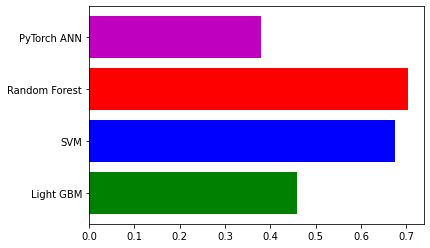

In [13]:

# plt.figure(figsize=(4,1))

plt.barh(ax,ay
#          ,height = 0.3
         ,color=['g','b','r','m'])
# plt.xticks(size=3)
# plt.yticks(size=3)
# plt.xlabel("Predicted probability",fontdict=fontdict)

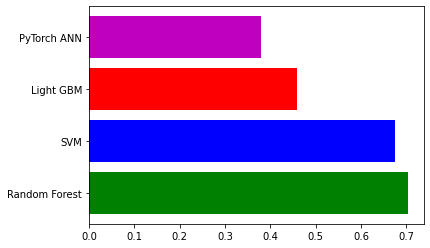

In [14]:

order = pd.Series(ay,index =ax).sort_values(ascending=False)
plt.barh(order.index, order,height = 0.8,color=['g','b','r','m'])
plt.show()